In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("Downloads/data_cleaned.csv")

In [4]:
df.shape

(891, 25)

In [5]:
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


# Segregating dep. & indep. variables

In [6]:
y=df["Survived"]

In [7]:
x=df.drop("Survived",axis=1)

# Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler 
sc=MinMaxScaler()

In [9]:
x_scaled=sc.fit_transform(x)

In [10]:
x=pd.DataFrame(x_scaled,columns=x.columns)

In [11]:
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY=train_test_split(x,y,random_state=56,stratify=y)

In [13]:
##Implementing KNN
from sklearn.neighbors import KNeighborsClassifier as KNN

In [14]:
from sklearn.metrics import f1_score

In [15]:
clf=KNN(n_neighbors=5) #instance of KNN
clf.fit(trainX,trainY)#fitting 
test_Predict=clf.predict(testX)

In [17]:
f1_score(test_Predict,testY)

0.6826347305389222

In [20]:
clf=KNN(n_neighbors=50) #instance of KNN
clf.fit(trainX,trainY)#fitting 
test_Predict=clf.predict(testX)
f1_score(test_Predict,testY)

0.7210884353741497

In [26]:
#ELBOW CURVE
def elbow(K):
    test_Error=[]
    for i in K:
        clf=KNN(n_neighbors=i)
        clf.fit(trainX,trainY)#fitting 
        test_Predict=clf.predict(testX)
        tmp=f1_score(test_Predict,testY)
        error=1-tmp
        test_Error.append(error)
    return test_Error

In [40]:
k=range(6,20,2)
test=elbow(k)

Text(0.5, 1.0, 'Elbow Curve')

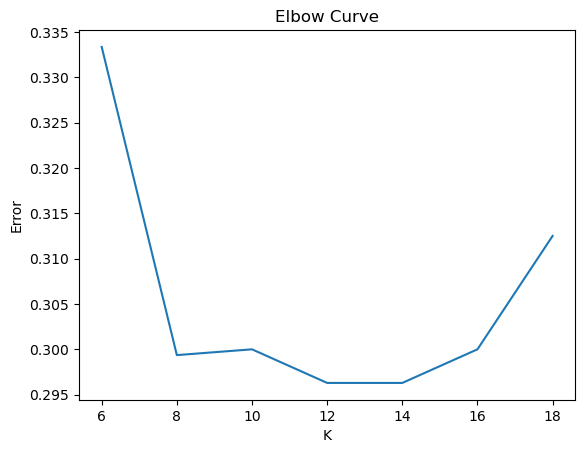

In [41]:
plt.plot(k,test)
plt.ylabel("Error")
plt.xlabel("K")
plt.title("Elbow Curve")

In [42]:
clf=KNN(n_neighbors=13)
clf.fit(trainX,trainY)
tp=clf.predict(testX)
f1_score(tp,testY)

0.703030303030303

# KNN: REGRESSION

In [49]:
data=pd.read_csv("Downloads/train_cleaned.csv")

In [50]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [54]:
Y=data["Item_Outlet_Sales"]
X=data.drop("Item_Outlet_Sales",axis=1)

In [55]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [63]:
X_scaled=sc.fit_transform(X)

In [64]:
X=pd.DataFrame(X_scaled,columns=X.columns)

In [65]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.435597,0.048866,0.927507,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.277283,0.058705,0.072068,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.819672,0.051037,0.468288,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.899297,0.000000,0.640093,0.541667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.418267,0.000000,0.095805,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [69]:
trainx,testx,trainy,testy=train_test_split(X,Y,random_state=56)

In [74]:
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import mean_squared_error as MSE

In [92]:
reg=KNR(n_neighbors=5)
reg.fit(trainx,trainy)
test_predict=reg.predict(testx)
error=MSE(test_predict,testy)
error

1714854.6015010108

In [76]:
#ELBOW CURVE
def Elbow(k):
    test_error=[]
    for i in k:
        reg=KNR(n_neighbors=i)
        reg.fit(trainx,trainy)
        tmp=reg.predict(testx)
        mse=MSE(tmp,testy)
        test_error.append(mse)
    return test_error

In [88]:
K=range(1,50)
error=Elbow(K)


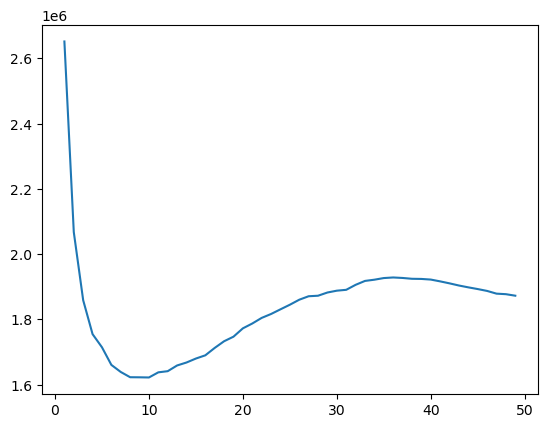

In [89]:
plt.plot(K,error)

In [91]:
#CHECK on K=10
reg=KNR(n_neighbors=10)
reg.fit(trainx,trainy)
tp=reg.predict(testx)
Error=MSE(tp,testy)
Error

1622446.6633706575